## Importing Libraries

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading Data

#### [Dataset Description](https://www.kaggle.com/kimjihoo/ds4c-what-is-this-dataset-detailed-description)

#### Infections over Time

In [21]:
infections_prov_time = pd.read_csv('../data/TimeProvince.csv')

In [22]:
infections_prov_time.head()

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


In [23]:
infections_prov_time.describe()

,time,confirmed,released,deceased
count,1564.000000,1564.000000,1564.000000,1564.000000
mean,7.304348,290.842711,126.927749,4.335038
std,7.972246,1112.384174,642.360989,19.190269
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,14.000000,2.000000,0.000000
75%,16.000000,72.250000,21.000000,0.000000
max,16.000000,6833.000000,5769.000000,163.000000


#### Weather

In [24]:
weather = pd.read_csv('../data/Weather.csv')

In [25]:
weather.head()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9


In [26]:
weather.describe()

,code,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
count,25135.000000,25120.000000,25130.000000,25132.000000,25135.000000,25126.000000,25106.000000,25115.000000
mean,32124.646907,13.615736,9.429001,18.524523,3.273738,5.104581,195.863937,65.548636
std,20313.519484,9.615995,10.001830,9.667336,12.642853,2.021354,106.903346,17.239956
min,10000.000000,-14.800000,-19.200000,-11.900000,0.000000,1.000000,20.000000,10.400000
25%,13500.000000,5.700000,1.100000,10.600000,0.000000,3.800000,90.000000,53.500000
50%,20000.000000,14.100000,9.400000,19.300000,0.000000,4.700000,200.000000,66.600000
75%,50500.000000,21.900000,18.100000,26.600000,0.200000,6.000000,290.000000,78.600000
max,70000.000000,33.900000,30.300000,40.000000,310.000000,29.400000,360.000000,100.000000


#### Combining datasets

In [101]:
#Summarizing infections over time to the day unit
infections_prov_time_clean = infections_prov_time.rename(index=str, columns={'confirmed':'accum_confirmed',
                                                        'released':'accum_released',
                                                        'deceased':'accum_deceased'}) \
                                                    .groupby(['province','date']) \
                                                    .agg({'accum_confirmed':sum,
                                                          'accum_released':sum,
                                                          'accum_deceased':sum}).reset_index()

infections_prov_time_clean['new_confirmed'] = infections_prov_time_clean.groupby(['province']).accum_confirmed.transform(lambda x : x - x.shift(1)).fillna(0)
infections_prov_time_clean['new_released'] = infections_prov_time_clean.groupby(['province']).accum_released.transform(lambda x : x - x.shift(1)).fillna(0)
infections_prov_time_clean['new_deceased'] = infections_prov_time_clean.groupby(['province']).accum_deceased.transform(lambda x : x - x.shift(1)).fillna(0)

infections_prov_time_clean

,province,date,accum_confirmed,accum_released,accum_deceased,new_confirmed,new_released,new_deceased
0,Busan,2020-01-20,0,0,0,0.0,0.0,0.0
1,Busan,2020-01-21,0,0,0,0.0,0.0,0.0
2,Busan,2020-01-22,0,0,0,0.0,0.0,0.0
3,Busan,2020-01-23,0,0,0,0.0,0.0,0.0
4,Busan,2020-01-24,0,0,0,0.0,0.0,0.0
5,Busan,2020-01-25,0,0,0,0.0,0.0,0.0
6,Busan,2020-01-26,0,0,0,0.0,0.0,0.0
7,Busan,2020-01-27,0,0,0,0.0,0.0,0.0
8,Busan,2020-01-28,0,0,0,0.0,0.0,0.0
9,Busan,2020-01-29,0,0,0,0.0,0.0,0.0


In [115]:
day_one_per_province = infections_prov_time_clean[infections_prov_time_clean['accum_confirmed'] > 0] \
                                                  .sort_values(['province','date']) \
                                                  .groupby(['province']) \
                                                  .head(1) \
                                                  .reset_index() \
                                                  .filter(['province','date']) \
                                                  .assign(days_since_day1 = 1)

day_one_per_province

,province,date,days_since_day1
0,Busan,2020-02-20,1
1,Chungcheongbuk-do,2020-02-21,1
2,Chungcheongnam-do,2020-02-21,1
3,Daegu,2020-02-18,1
4,Daejeon,2020-02-22,1
5,Gangwon-do,2020-02-22,1
6,Gwangju,2020-02-04,1
7,Gyeonggi-do,2020-01-24,1
8,Gyeongsangbuk-do,2020-02-19,1
9,Gyeongsangnam-do,2020-02-19,1


In [175]:
infections_since_day1 = pd.merge(infections_prov_time_clean,day_one_per_province, how='left')
infections_since_day1['after_day1'] = infections_since_day1.groupby(['province']).days_since_day1.transform(lambda x : x.ffill()).fillna(0)
infections_since_day1 = infections_since_day1[infections_since_day1['after_day1'] == 1]
infections_since_day1['days_since_day1'] = infections_since_day1.groupby(['province']).after_day1.transform(lambda x : x.cumsum()).fillna(0)
infections_since_day1 = infections_since_day1.drop(columns=['after_day1'], axis=1)
infections_since_day1

,province,date,accum_confirmed,accum_released,accum_deceased,new_confirmed,new_released,new_deceased,days_since_day1
31,Busan,2020-02-20,8,0,0,8.0,0.0,0.0,1.0
32,Busan,2020-02-21,8,0,0,0.0,0.0,0.0,2.0
33,Busan,2020-02-22,11,0,0,3.0,0.0,0.0,3.0
34,Busan,2020-02-23,19,0,0,8.0,0.0,0.0,4.0
35,Busan,2020-02-24,34,0,0,15.0,0.0,0.0,5.0
36,Busan,2020-02-25,42,0,0,8.0,0.0,0.0,6.0
37,Busan,2020-02-26,58,0,0,16.0,0.0,0.0,7.0
38,Busan,2020-02-27,61,0,0,3.0,0.0,0.0,8.0
39,Busan,2020-02-28,65,0,0,4.0,0.0,0.0,9.0
40,Busan,2020-02-29,80,0,0,15.0,0.0,0.0,10.0


In [176]:
infections_since_day1.sort_values(['days_since_day1','province'])

,province,date,accum_confirmed,accum_released,accum_deceased,new_confirmed,new_released,new_deceased,days_since_day1
31,Busan,2020-02-20,8,0,0,8.0,0.0,0.0,1.0
124,Chungcheongbuk-do,2020-02-21,1,0,0,1.0,0.0,0.0,1.0
216,Chungcheongnam-do,2020-02-21,1,0,0,1.0,0.0,0.0,1.0
305,Daegu,2020-02-18,1,0,0,1.0,0.0,0.0,1.0
401,Daejeon,2020-02-22,2,0,0,2.0,0.0,0.0,1.0
493,Gangwon-do,2020-02-22,6,0,0,6.0,0.0,0.0,1.0
567,Gwangju,2020-02-04,1,0,0,1.0,0.0,0.0,1.0
648,Gyeonggi-do,2020-01-24,1,0,0,1.0,0.0,0.0,1.0
766,Gyeongsangbuk-do,2020-02-19,2,1,0,2.0,0.0,0.0,1.0
858,Gyeongsangnam-do,2020-02-19,3,0,0,3.0,0.0,0.0,1.0


In [177]:
total_per_province = infections_since_day1.sort_values(['province','date']).groupby('province').tail(1).reset_index()
total_per_province = total_per_province[total_per_province['accum_confirmed'] >= 100]
total_per_province

,index,province,date,accum_confirmed,accum_released,accum_deceased,new_confirmed,new_released,new_deceased,days_since_day1
0,91,Busan,2020-04-20,132,115,3,2.0,0.0,0.0,61.0
2,275,Chungcheongnam-do,2020-04-20,141,122,0,0.0,0.0,0.0,60.0
3,367,Daegu,2020-04-20,6833,5769,163,1.0,26.0,2.0,63.0
7,735,Gyeonggi-do,2020-04-20,656,387,14,2.0,17.0,0.0,88.0
8,827,Gyeongsangbuk-do,2020-04-20,1361,1064,51,2.0,7.0,0.0,62.0
9,919,Gyeongsangnam-do,2020-04-20,116,87,0,0.0,2.0,0.0,62.0
15,1471,Seoul,2020-04-20,624,304,2,0.0,16.0,0.0,85.0


In [178]:
infections_since_day1[infections_since_day1.province.isin(total_per_province['province'])]

,province,date,accum_confirmed,accum_released,accum_deceased,new_confirmed,new_released,new_deceased,days_since_day1
31,Busan,2020-02-20,8,0,0,8.0,0.0,0.0,1.0
32,Busan,2020-02-21,8,0,0,0.0,0.0,0.0,2.0
33,Busan,2020-02-22,11,0,0,3.0,0.0,0.0,3.0
34,Busan,2020-02-23,19,0,0,8.0,0.0,0.0,4.0
35,Busan,2020-02-24,34,0,0,15.0,0.0,0.0,5.0
36,Busan,2020-02-25,42,0,0,8.0,0.0,0.0,6.0
37,Busan,2020-02-26,58,0,0,16.0,0.0,0.0,7.0
38,Busan,2020-02-27,61,0,0,3.0,0.0,0.0,8.0
39,Busan,2020-02-28,65,0,0,4.0,0.0,0.0,9.0
40,Busan,2020-02-29,80,0,0,15.0,0.0,0.0,10.0


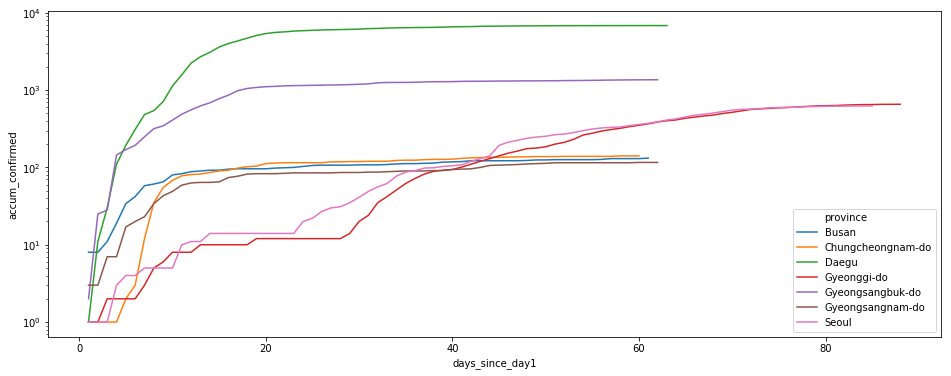

In [180]:
plt.figure(figsize=(16, 6))
p = sns.lineplot(x="days_since_day1", y="accum_confirmed", hue="province", data=infections_since_day1[infections_since_day1.province.isin(total_per_province['province'])]);
p.set_yscale("log")

In [ ]:
#provinces = pd.DataFrame(province = )

In [151]:
infections_prov_time_clean.reset_index().province.value_counts().describe()

count    17.0
mean     92.0
std       0.0
min      92.0
25%      92.0
50%      92.0
75%      92.0
max      92.0
Name: province, dtype: float64

In [35]:
infections_prov_time_clean \
                            

accum_confirmed  accum_released  accum_deceased  \
date       province                                                             
2020-01-20 Busan                            0               0               0   
           Chungcheongbuk-do                0               0               0   
           Chungcheongnam-do                0               0               0   
           Daegu                            0               0               0   
           Daejeon                          0               0               0   
           Gangwon-do                       0               0               0   
           Gwangju                          0               0               0   
           Gyeonggi-do                      0               0               0   
           Gyeongsangbuk-do                 0               0               0   
           Gyeongsangnam-do                 0               0               0   
           Incheon                          1               0               0   
           Jeju-do                          0               0               0   
           Jeollabuk-do                     0               0               0   
           Jeollanam-do                     0               0               0   
           Sejong                           0               0               0   
           Seoul                            0               0               0   
           Ulsan                            0               0               0   
2020-01-21 Busan                            0               0               0   
           Chungcheongbuk-do                0               0               0   
           Chungcheongnam-do                0               0               0   
           Daegu                            0               0               0   
           Daejeon                          0               0               0   
           Gangwon-do                       0               0               0   
           Gwangju                          0               0               0   
           Gyeonggi-do                      0               0               0   
           Gyeongsangbuk-do                 0               0               0   
           Gyeongsangnam-do                 0               0               0   
           Incheon                          1               0               0   
           Jeju-do                          0               0               0   
           Jeollabuk-do                     0               0               0   
...                                       ...             ...             ...   
2020-04-19 Daejeon                         39              25               0   
           Gangwon-do                      53              28               2   
           Gwangju                         30              22               0   
           Gyeonggi-do                    654             370              14   
           Gyeongsangbuk-do              1359            1057              51   
           Gyeongsangnam-do               116              85               0   
           Incheon                         91              55               0   
           Jeju-do                         13               6               0   
           Jeollabuk-do                    17               9               0   
           Jeollanam-do                    15               8               0   
           Sejong                          46              29               0   
           Seoul                          624             288               2   
           Ulsan                           42              34               1   
2020-04-20 Busan                          132             115               3   
           Chungcheongbuk-do               45              38               0   
           Chungcheongnam-do              141             122               0   
           Daegu                         6833            5769

In [32]:
infections_weather_over_time = pd.merge(infections_prov_time_clean,weather, on=['province','date'])
infections_weather_over_time

,province,date,confirmed,released,deceased,code,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,Busan,2020-01-20,0,0,0,11000,5.1,1.6,9.8,0.0,6.1,270.0,45.6
1,Chungcheongbuk-do,2020-01-20,0,0,0,40000,0.9,-2.9,5.8,0.0,5.6,270.0,63.3
2,Chungcheongnam-do,2020-01-20,0,0,0,41000,1.7,-2.7,7.1,0.0,6.2,290.0,62.0
3,Daegu,2020-01-20,0,0,0,12000,4.6,2.4,8.1,0.0,6.4,290.0,44.1
4,Daejeon,2020-01-20,0,0,0,15000,3.4,-0.9,8.1,0.0,5.5,270.0,57.3
5,Gangwon-do,2020-01-20,0,0,0,30000,3.7,1.1,7.5,0.0,5.2,250.0,38.8
6,Gwangju,2020-01-20,0,0,0,13000,4.0,1.2,7.9,0.0,3.3,270.0,63.1
7,Gyeonggi-do,2020-01-20,0,0,0,20000,1.2,-2.8,5.7,0.0,6.4,290.0,68.5
8,Gyeongsangbuk-do,2020-01-20,0,0,0,60000,3.6,-0.4,6.9,0.0,7.5,270.0,48.6
9,Gyeongsangnam-do,2020-01-20,0,0,0,61000,4.4,0.2,9.1,0.0,3.6,270.0,42.6


In [34]:
infections_weather_over_time

,province,date,accum_confirmed,accum_released,accum_deceased,code,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity,new_confirmed
0,Busan,2020-01-20,0,0,0,11000,5.1,1.6,9.8,0.0,6.1,270.0,45.6,NaN
1,Chungcheongbuk-do,2020-01-20,0,0,0,40000,0.9,-2.9,5.8,0.0,5.6,270.0,63.3,0.0
2,Chungcheongnam-do,2020-01-20,0,0,0,41000,1.7,-2.7,7.1,0.0,6.2,290.0,62.0,0.0
3,Daegu,2020-01-20,0,0,0,12000,4.6,2.4,8.1,0.0,6.4,290.0,44.1,0.0
4,Daejeon,2020-01-20,0,0,0,15000,3.4,-0.9,8.1,0.0,5.5,270.0,57.3,0.0
5,Gangwon-do,2020-01-20,0,0,0,30000,3.7,1.1,7.5,0.0,5.2,250.0,38.8,0.0
6,Gwangju,2020-01-20,0,0,0,13000,4.0,1.2,7.9,0.0,3.3,270.0,63.1,0.0
7,Gyeonggi-do,2020-01-20,0,0,0,20000,1.2,-2.8,5.7,0.0,6.4,290.0,68.5,0.0
8,Gyeongsangbuk-do,2020-01-20,0,0,0,60000,3.6,-0.4,6.9,0.0,7.5,270.0,48.6,0.0
9,Gyeongsangnam-do,2020-01-20,0,0,0,61000,4.4,0.2,9.1,0.0,3.6,270.0,42.6,0.0
